In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
# Цель: проанализировать данные, проверить собственные гипотезы
# Задачи: провести EDA, создать модели, сформулировать гипотезы и проверить их правдивость(можно при помощи графиков)

import pandas as pd # Библиотека для работы с таблицами, структурой dataframe
import numpy as np # Библиотека для работы с матрицами, выш. мат.
import seaborn as sns # Библиотека для визуализации данных
import matplotlib.pyplot as plt # Библиотека для работы с анализом данных, таблицами
%matplotlib inline

df = pd.read_csv('/kaggle/input/spotify/Spotify.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# **📊EDA и ресерч-анализ. Графики, применение инструментов EDA. Комментарий до графика. Вывод после графика/стат методов. Корреляция колонок с таргетом.**

**track_id** - уникальный идентификатор

**artists** - исполнитель

**album_name** - название альбома

**track_name** - название трека

**popularity** - популярность

**duration_ms** - длительность трека

**explicit** - эксплицитность

**danceability** - насколько трек подходит для танцев

**energy** - энергичность

**key** - тональность трека

**loudness** - громкость

**mode** - режим трека

**speechiness** - речевая насыщенность

**acousticness** - акустичность

**instrumentalness** - инструментальность

**liveness** - живое исполнение

**valence** - позитивность

**tempo** - темп

**time_signature** - такт

**track_genre** - жанр

In [7]:
df = df.drop(columns=['Unnamed: 0', 'track_id'])

In [4]:
# Минимальные и максимальные значения в каждом столбце

for column in df.columns:
    print(f"\n{column}:")
    
    if df[column].dtype in ['int64', 'float64']:
        print(f"  Min: {df[column].min():.4f}")
        print(f"  Max: {df[column].max():.4f}")
    
    elif df[column].dtype == 'object':
        print(f"  Data type: String")
        print(f"  Unique values: {df[column].nunique()}")
        if df[column].nunique() <= 20:
            print(f"  Values: {df[column].unique().tolist()}")
    
    elif df[column].dtype == 'bool':
        print(f"  Min (False %): {(df[column] == False).mean()*100:.2f}%")
        print(f"  Max (True %): {(df[column] == True).mean()*100:.2f}%")


artists:
  Data type: String
  Unique values: 31437

album_name:
  Data type: String
  Unique values: 46579

track_name:
  Data type: String
  Unique values: 73602

popularity:
  Min: 0.0000
  Max: 100.0000

duration_ms:
  Min: 0.0000
  Max: 5237295.0000

explicit:
  Min (False %): 91.45%
  Max (True %): 8.55%

danceability:
  Min: 0.0000
  Max: 0.9850

energy:
  Min: 0.0000
  Max: 1.0000

key:
  Min: 0.0000
  Max: 11.0000

loudness:
  Min: -49.5310
  Max: 4.5320

mode:
  Min: 0.0000
  Max: 1.0000

speechiness:
  Min: 0.0000
  Max: 0.9650

acousticness:
  Min: 0.0000
  Max: 0.9960

instrumentalness:
  Min: 0.0000
  Max: 1.0000

liveness:
  Min: 0.0000
  Max: 1.0000

valence:
  Min: 0.0000
  Max: 0.9950

tempo:
  Min: 0.0000
  Max: 243.3720

time_signature:
  Min: 0.0000
  Max: 5.0000

track_genre:
  Data type: String
  Unique values: 114


In [5]:
df.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# Гипотеза: треки с громкостью от -22 до -6,5 популярнее остальных, потому что такая громкость сбалансированная и должна нравиться большинству пользователей.

In [6]:
in_range = df[(df['loudness'] >= -22) & (df['loudness'] <= -6.5)]
out_range = df[(df['loudness'] < -22) | (df['loudness'] > -6.5)]

pop_in_range = in_range['popularity'].mean()
pop_out_range = out_range['popularity'].mean()

print(f"Популярность в диапазоне -22 до -6.5 dB: {pop_in_range:.1f}")
print(f"Популярность вне диапазона: {pop_out_range:.1f}")

Популярность в диапазоне -22 до -6.5 dB: 33.0
Популярность вне диапазона: 33.5


# Гипотеза не подтвердилась. Я предполагал, что громкость 50-80% является оптимальной и треки с таким значением параметра популярнее.

# Гипотеза: больше половины треков имеют танцевальность больше 0.5, так как, по моим наблюдениям, большинство музыки очень хорошо подходит под танцы

In [7]:
high_dance = (df['danceability'] > 0.5).sum()
total_tracks = len(df)

percentage = (high_dance / total_tracks)

print(f"Всего треков в датасете: {total_tracks}")
print(f"Треков с танцевальностью > 0.5: {high_dance} ")

Всего треков в датасете: 114000
Треков с танцевальностью > 0.5: 76423 


# Гипотеза верная. Моё предположение о том, что больше половины треков более танцевальные, подтвердилось.

# Гипотеза: большинство треков находятся в диапазоне от 20(включительно) до 45(включительно) по популярности. Я думаю, это среднестатистические значения популярности, в которые большая часть треков, соответственно, входит.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


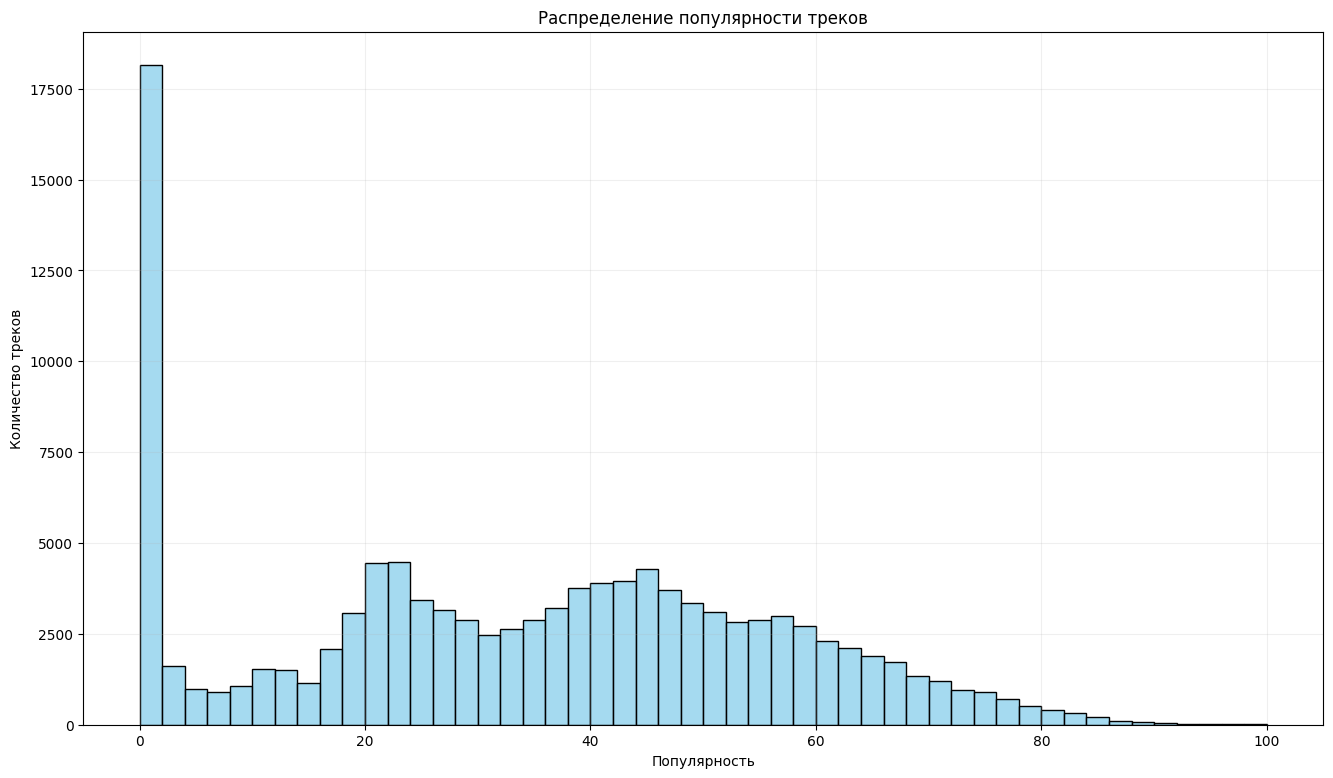

Диапазон 0-19:    32067 треков
Диапазон 20-45:   45491 треков
Диапазон 46-100:  36442 треков
Всего треков:     114000


In [8]:
# Распределение популярности

plt.figure(figsize=(16, 9))
sns.histplot(df['popularity'], bins=50, color='skyblue')   
plt.title('Распределение популярности треков')
plt.xlabel('Популярность')
plt.ylabel('Количество треков')
plt.grid(True, alpha=0.2)
plt.show()

count_0_to_19 = df[(df['popularity'] >= 0) & (df['popularity'] <= 19)].shape[0]
count_20_to_45 = df[(df['popularity'] >= 20) & (df['popularity'] <= 45)].shape[0]
count_46_to_100 = df[(df['popularity'] >= 46) & (df['popularity'] <= 100)].shape[0]

print(f"Диапазон 0-19:    {count_0_to_19:5d} треков")
print(f"Диапазон 20-45:   {count_20_to_45:5d} треков")
print(f"Диапазон 46-100:  {count_46_to_100:5d} треков")
print(f"Всего треков:     {len(df):5d}")

# Гипотеза не подтвердилась. В диапазон от 20 до 45 входит меньше половины треков.

# Гипотеза: по данным из интернета, рок занимает 3 место по популярности среди всех жанров музыки. В нашем датасете рок входит в десятку самых популярных музыкальных жанров.

10 самых популярных жанров
1. pop-film: 59.28
2. k-pop: 56.9
3. chill: 53.65
4. sad: 52.38
5. grunge: 49.59
6. indian: 49.54
7. anime: 48.77
8. emo: 48.13
9. sertanejo: 47.87
10. pop: 47.58


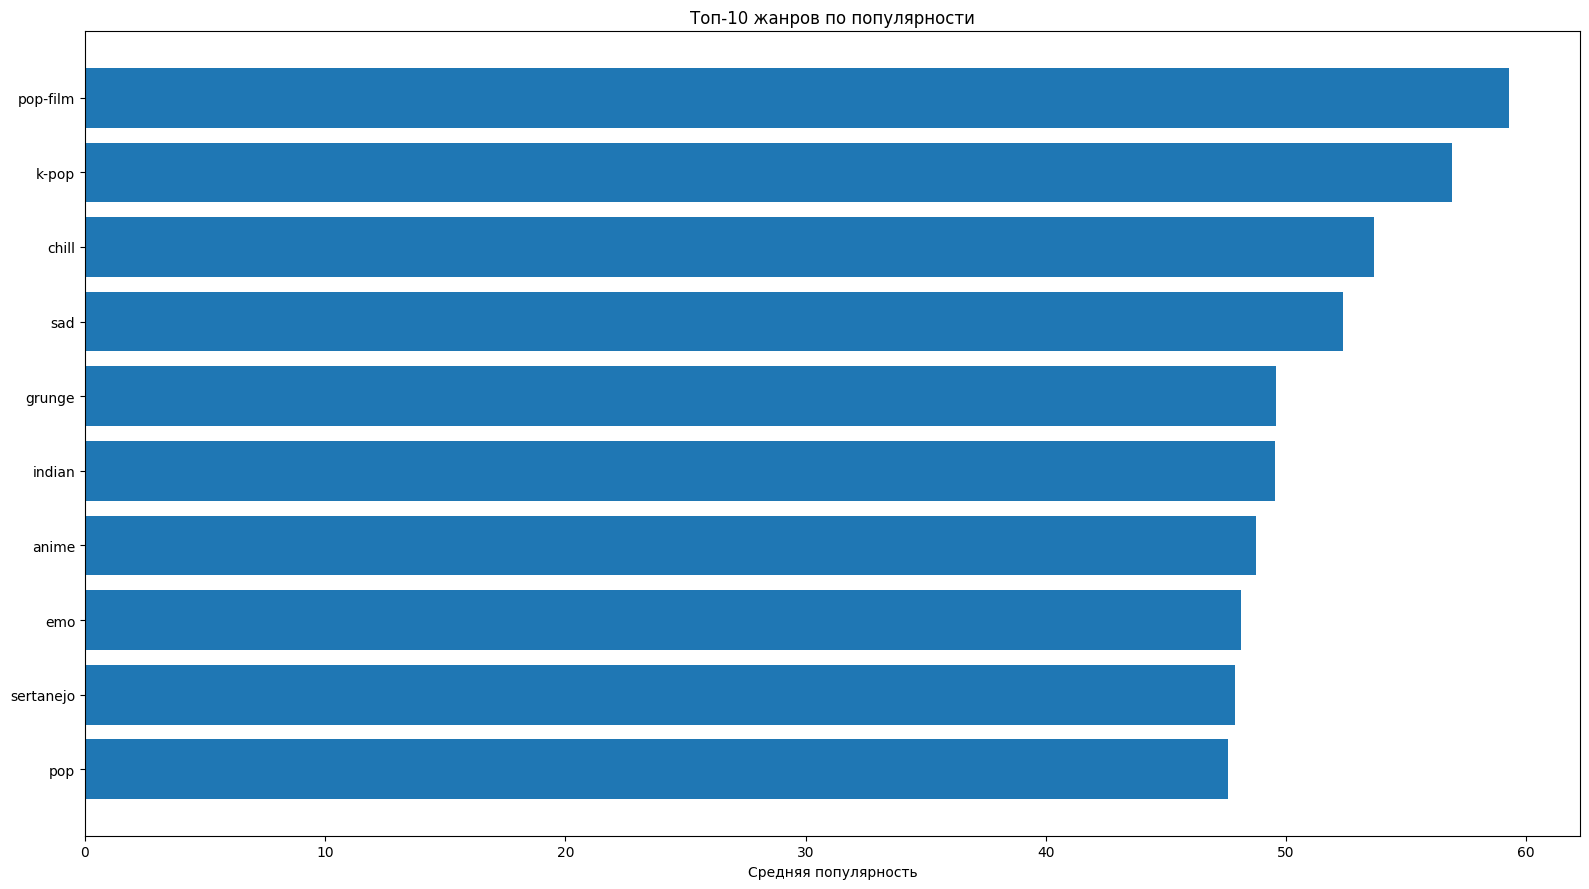

In [9]:
top_10 = df.groupby('track_genre')['popularity'].mean().nlargest(10).round(2)

print("10 самых популярных жанров")
for i, (genre, pop) in enumerate(top_10.items(), 1):
    print(f"{i}. {genre}: {pop}")

plt.figure(figsize=(16, 9))
plt.barh(top_10.index[::-1], top_10.values[::-1])
plt.xlabel('Средняя популярность')
plt.title('Топ-10 жанров по популярности')
plt.tight_layout()
plt.show()

# Гипотеза не подтвердилась, рок не входит в 10 самых популярных треков в нашем датасете.

# Гипотеза: связь между популярностью и танцевальностью прямолинейна. Чем больше танцевальность, тем больше популярность. Танцевальность и популярность сильно зависят друг от друга.

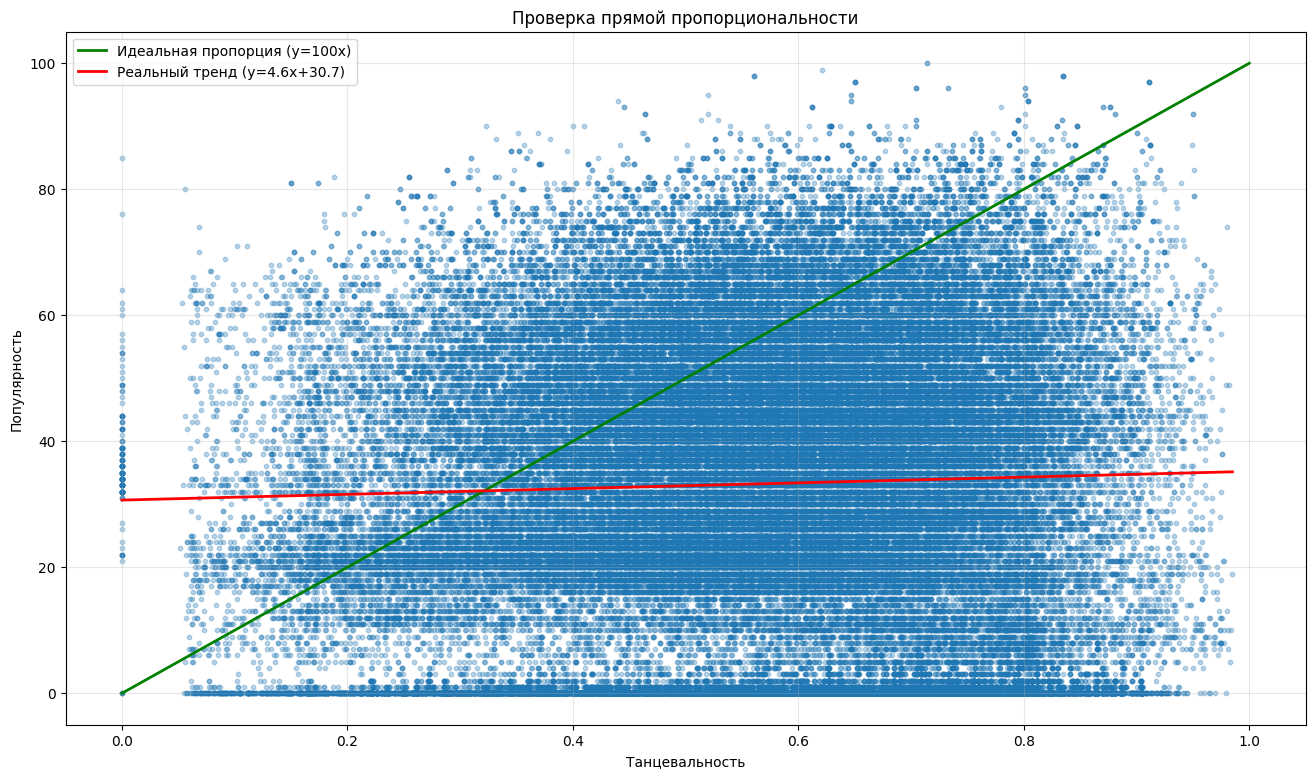

Коэффициент корреляции: 0.035


In [10]:
plt.figure(figsize=(16, 9))
plt.scatter(df['danceability'], df['popularity'], alpha=0.3, s=10)

ideal_x = [0, 1]
ideal_y = [0, 100]
plt.plot(ideal_x, ideal_y, 'green', linewidth=2, label='Идеальная пропорция (y=100x)')

z = np.polyfit(df['danceability'].dropna(), df['popularity'].dropna(), 1)
p = np.poly1d(z)
plt.plot(sorted(df['danceability'].dropna()), 
         p(sorted(df['danceability'].dropna())), 
         'red', linewidth=2, label=f'Реальный тренд (y={z[0]:.1f}x+{z[1]:.1f})')

plt.xlabel('Танцевальность')
plt.ylabel('Популярность')
plt.title('Проверка прямой пропорциональности')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

corr = df['danceability'].corr(df['popularity'])
print(f"Коэффициент корреляции: {corr:.3f}")

# Гипотеза подтвердилась. Несильная прямая пропорциональность. Чем больше танцевальность, тем больше популярность.

# **👨‍💻Feature Engineering. Корреляция новых колонок с таргетом. Feature Importances. Простая модель.**

In [11]:
df.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [12]:
columns_to_fill_in = ['artists', 'album_name', 'track_name']

for column in columns_to_fill_in:
    if column in df.columns and df[column].isnull().sum() > 0:
        most_common = df[column].mode()[0]
        
        df[column] = df[column].fillna(most_common)

missing_after = df.isnull().sum()


df.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [13]:
df['duration_min'] = df['duration_ms'] / 60000
df['duration_min'] = df['duration_min'].round(2)

sample_df = df[['duration_ms', 'duration_min']].head(5).copy()

for i, (ms, minutes) in enumerate(zip(sample_df['duration_ms'], sample_df['duration_min']), 1):
    total_seconds = ms / 1000
    mins = int(total_seconds // 60)
    secs = int(total_seconds % 60)
    
    print(f"{i}. {ms:,.0f} мс → {minutes:.2f} мин ({mins}:{secs:02d})")

1. 230,666 мс → 3.84 мин (3:50)
2. 149,610 мс → 2.49 мин (2:29)
3. 210,826 мс → 3.51 мин (3:30)
4. 201,933 мс → 3.37 мин (3:21)
5. 198,853 мс → 3.31 мин (3:18)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

df['speech_energy'] = df['speechiness'] * df['energy']
df['explicit_int'] = df['explicit'].astype(int)

features = ['danceability', 'energy', 'valence', 'acousticness', 
            'instrumentalness', 'liveness', 'speechiness', 'tempo', 
            'loudness', 'explicit_int', 'speech_energy']
X = df[features].fillna(df[features].mean())
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

importances = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Важность признаков:")
print(importances.head())

R² score: 0.15
RMSE: 20.49
Важность признаков:
             feature  importance
3       acousticness    0.160432
2            valence    0.133163
0       danceability    0.123448
4   instrumentalness    0.103805
10     speech_energy    0.093189


In [22]:
target = 'popularity'
correlation = df['speech_energy'].corr(df[target])

print(f"Корреляция новой колонки speech_energy с популярностью: {correlation:.3f}")

if correlation > 0:
    print("Корреляция положительная")
elif correlation == 0:
    print("Корреляция отсутствует")
else:
    print("Корреляция отрицательная")

Корреляция новой колонки speech_energy с популярностью: -0.046
Корреляция отрицательная


# **👩‍🎓Эксперименты с моделями машинного обучения/глубокого обучения. По одной из каждого семейства. Линейные, деревья, модификации градиентного бустинга , нейронные сети. На основе результатов выбрать лучшую - делаем кросс-валидацию(не менее 5 фолдов) и итоговый вывод.**

In [19]:
# Линейная модель для предсказания популярности трека

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, mean_absolute_error

features = [
    'danceability', 'energy', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'speech_energy' ]

X = df[features].fillna(df[features].mean())
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

def safe_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

metrics = {
    'R²': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'MAPE': safe_mape(y_test.values, y_pred)
}

for name, value in metrics.items():
    if name in ['R²', 'MAPE']:
        print(f"{name:10}: {value:.4f}")
    else:
        print(f"{name:10}: {value:.2f}")

coefficients = model.coef_
intercept = model.intercept_

coefficients_df = pd.DataFrame({
    'Признак': features, 
    'Коэффициент': coefficients.round(6)
})

coefficients_df['Абс.коэффициент'] = coefficients_df['Коэффициент'].abs()
coefficients_df = coefficients_df.sort_values('Абс.коэффициент', ascending=False)

print(coefficients_df[['Признак', 'Коэффициент']].to_string(index=False))

R²        : 0.0210
MSE       : 483.10
RMSE      : 21.98
MAE       : 18.35
MAPE      : 148.4575
         Признак  Коэффициент
   speech_energy   -20.104543
         valence   -10.016120
    danceability     8.867346
instrumentalness    -8.287294
     speechiness     1.387219
        liveness     1.385264
          energy    -1.252339
    acousticness    -1.099031
        loudness     0.120639
           tempo     0.014264


In [26]:
# Модель деревья для оценивания влияния каждого признака

features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
            'speech_energy' ]

X = df[features].fillna(df[features].mean())
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

def safe_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

metrics = {
    'R²': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'MAPE': safe_mape(y_test.values, y_pred)
}

for name, value in metrics.items():
    if name == 'R²':
        print(f"{name}: {value:.4f}")
    elif name == 'MAPE':
        print(f"{name}: {value:.2f}%")
    else:
        print(f"{name}: {value:.2f}")

print(' ')
importance_df = pd.DataFrame({
    'Признак': features,
    'Важность': model.feature_importances_
}).sort_values('Важность', ascending=False)

print(importance_df.to_string(index=False))

R²: 0.5410
MSE: 226.50
RMSE: 15.05
MAE: 10.75
MAPE: 68.24%
 
         Признак  Важность
    acousticness  0.117980
           tempo  0.113557
    danceability  0.112727
         valence  0.110874
        loudness  0.106741
        liveness  0.099789
          energy  0.090606
   speech_energy  0.085736
     speechiness  0.082548
instrumentalness  0.079442


In [9]:
# Модель модификация градиентного бустинга для оценивания влияния каждого признака

from xgboost import XGBRegressor

df['tempo_valence'] = df['tempo'] * df['valence']

features = [
    'danceability', 'energy', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'speech_energy', 'tempo_valence' ]

X = df[features].fillna(df[features].mean())
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

def safe_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

metrics = {
    'R²': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'MAPE': safe_mape(y_test.values, y_pred)
}

for name, value in metrics.items():
    if name in ['R²', 'MAPE']:
        print(f"{name:10}: {value:.4f}")
    else:
        print(f"{name:10}: {value:.2f}")

print(' ')

importance_df = pd.DataFrame({
    'Признак': features,
    'Важность': model.feature_importances_
}).sort_values('Важность', ascending=False)


print(importance_df.to_string(index=False))

R²        : 0.2173
MSE       : 386.23
RMSE      : 19.65
MAE       : 15.92
MAPE      : 121.0426
 
         Признак  Важность
    acousticness  0.114957
   speech_energy  0.104087
         valence  0.103509
instrumentalness  0.101189
    danceability  0.088358
   tempo_valence  0.088194
        loudness  0.084646
           tempo  0.082016
          energy  0.081736
        liveness  0.076626
     speechiness  0.074683


In [28]:
# Модель нейронные сети для оценивания влияния каждого признака

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
            'speech_energy', 'tempo_valence' ]

X = df[features].fillna(df[features].mean())
y = df['popularity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

def safe_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

metrics = {
    'R²': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'MAPE': safe_mape(y_test.values, y_pred)
}

for name, value in metrics.items():
    if name == 'R²':
        print(f"{name}: {value:.4f}")
    elif name == 'MAPE':
        print(f"{name}: {value:.2f}%")
    else:
        print(f"{name}: {value:.2f}")

print(' ')
perm_importance = permutation_importance(
    model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring='neg_mean_squared_error'
)

importance_df = pd.DataFrame({
    'Признак': features,
    'Важность': perm_importance.importances_mean
}).sort_values('Важность', ascending=False)

print(importance_df.to_string(index=False))

R²: 0.1042
MSE: 442.07
RMSE: 21.03
MAE: 17.07
MAPE: 132.38%
 
         Признак  Важность
   tempo_valence 77.660610
    danceability 57.855758
          energy 44.908211
           tempo 42.966711
        loudness 40.698713
    acousticness 39.358297
         valence 33.905882
   speech_energy 25.251508
instrumentalness 24.851434
     speechiness 24.496451
        liveness 15.599979


# Самая лучшая модель - деревья

In [11]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
            'speech_energy', 'tempo_valence']

X = df[features].fillna(df[features].mean())
y = df['popularity']

print("Кросс-валидация результаты (5 фолдов):")

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
mse_scores = []
rmse_scores = []
mae_scores = []
mape_scores = []

def safe_mape(y_true, y_pred):
    mask = y_true != 0
    if np.sum(mask) == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

fold_num = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = safe_mape(y_test.values, y_pred)
    
    r2_scores.append(r2)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    mape_scores.append(mape)
    
    fold_num += 1

print(f"R²: [{', '.join([f'{s:.4f}' for s in r2_scores])}]")
print(f"Средняя R²: {np.mean(r2_scores):.4f}")
print(f"MSE: [{', '.join([f'{s:.2f}' for s in mse_scores])}]")
print(f"Средняя MSE: {np.mean(mse_scores):.2f}")
print(f"RMSE: [{', '.join([f'{s:.2f}' for s in rmse_scores])}]")
print(f"Средняя RMSE: {np.mean(rmse_scores):.2f}")
print(f"MAE: [{', '.join([f'{s:.2f}' for s in mae_scores])}]")
print(f"Средняя MAE: {np.mean(mae_scores):.2f}")
print(f"MAPE: [{', '.join([f'{s:.2f}' for s in mape_scores])}]")
print(f"Средняя MAPE: {np.mean(mape_scores):.2f}")

print(f"\nСводка:")
print(f"Средняя R²: {np.mean(r2_scores):.4f}")
print(f"Средняя MSE: {np.mean(mse_scores):.2f}")
print(f"Средняя RMSE: {np.mean(rmse_scores):.2f}")
print(f"Средняя MAE: {np.mean(mae_scores):.2f}")
print(f"Средняя MAPE: {np.mean(mape_scores):.2f}")

print(f"\nИтоговый вывод:")
std_r2 = np.std(r2_scores)
print(f"Разброс между фолдами R²: {std_r2:.4f}")

if std_r2 < 0.05:
    print("Модель устойчивая (низкий разброс между фолдами)")
elif std_r2 < 0.1:
    print("Модель умеренно устойчивая")
else:
    print("Модель неустойчивая (высокий разброс между фолдами)")

print(f"Качество модели (R²): {np.mean(r2_scores):.1%}")

Кросс-валидация результаты (5 фолдов):
R²: [0.5397, 0.5345, 0.5307, 0.5347, 0.5433]
Средняя R²: 0.5366
MSE: [227.16, 232.65, 235.75, 229.69, 227.55]
Средняя MSE: 230.56
RMSE: [15.07, 15.25, 15.35, 15.16, 15.08]
Средняя RMSE: 15.18
MAE: [10.75, 10.83, 10.96, 10.82, 10.76]
Средняя MAE: 10.82
MAPE: [68.59, 67.29, 67.36, 69.17, 67.69]
Средняя MAPE: 68.02

Сводка:
Средняя R²: 0.5366
Средняя MSE: 230.56
Средняя RMSE: 15.18
Средняя MAE: 10.82
Средняя MAPE: 68.02

Итоговый вывод:
Разброс между фолдами R²: 0.0044
Модель устойчивая (низкий разброс между фолдами)
Качество модели (R²): 53.7%


# Самой лучшей моделью оказалась модель деревья, так как у неё самый высокий R² = 0.5418, самый низкий MAPE = 68.51%, самый низкий RMSE = 15.05, самый низкий MSE = 226.52 и самый низкий показатель MAE = 10.79 среди четырёх моделей(линейная, деревья, градиентный бустинг, нейронные сети)